## 要求

1）根据语音分帧的思想，编写分帧函数。函数定义如下： 
函数格式：frameout=enframe(x,win,inc)。 
输入参数：x 是语音信号；win 是帧长或窗函数，若为窗函数，帧长便取窗函数长；inc
是帧移。 
输出参数：frameout 是分帧后的数组，长度为帧长和帧数的乘积。 
根据分帧后的语音，绘制连续四帧语音信号（不用窗函数)

In [5]:
# -*- coding:utf-8
import numpy as np
import soundfile
import pyaudio #录制和播放
import wave # 导入wave库，处理音频
import time
import matplotlib.pyplot as plt
from scipy.io import wavfile #读取wav提取数据
from pydub import AudioSegment #　音频处理
plt.rcParams['font.family'] = 'simhei'
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（可以根据需要选择其他字体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

D:\Anaconda3\envs\wave\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [ ]:
def play_audio(rate,file_name): # rate 采用率 file_name保存文件名
    Chunk = 1024 # 读取的音频帧的大小
    Format = pyaudio.paInt16 #　音频格式为16位的整数
    Channels = 2 # 通道为2
    Rate = rate #采用率
    Record_times = 5 # 录制时间
    Nframes = int(Rate / Chunk * Record_times) # 计算出所需采集帧的数量
    File_name = file_name
    
    # 实例化一个对象
    p = pyaudio.PyAudio()
    
    # 使用该对象打开声卡，进入参数配置
    stream = p.open(format = Format,
                    channels = Channels,
                    rate = Rate,
                    input = True,
                    frames_per_buffer = Chunk)
    print("开始录音，整个过程持续五秒钟!!!")
    frames = []
    for i in range(0,Nframes):
        data = stream.read(Chunk)
        frames.append(data)
    print("完成录音!!!")
    
    # 关闭
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    # 存储wav
    wf = wave.open(File_name,'wb') # 写入wav文件
    wf.setnchannels(Channels)# 设置通道数
    wf.setsampwidth(p.get_sample_size(Format)) # 设置样本宽度
    wf.setframerate(Rate)# 设置采样率
    wf.writeframes(b''.join(frames)) # 将列表的数据会合写入文件
    wf.close()
    print(f"语音保存为{File_name}")
    

In [2]:
play_audio(16000,"实验3.wav")

NameError: name 'play_audio' is not defined

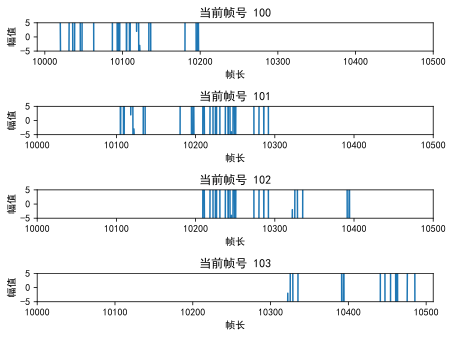

In [6]:
def enframe(x,win, inc): # x语音信号 win 帧长 inc 帧移
    num_frames = 1 + (len(x) - win) // inc # 分成帧的数量

    return num_frames

# 加载.wav文件
wav_file = "../01.wav"  # 替换为您的.wav文件路径
wf = wave.open(wav_file, 'rb')
audio_data = wf.readframes(-1)
audio_data = np.frombuffer(audio_data, dtype=np.int16)
wf.close()

# 设置帧长和帧移
win = 200  # 帧长
inc = 100  # 帧移



# 生成 x 轴数据
x = np.linspace(0, len(audio_data), len(audio_data))

# 调用分帧函数
num_frames = enframe(audio_data, win, inc)
c = 0
# # 绘制连续四帧语音信号
for i in range(100,104):
    c += 1
    plt.subplot(4, 1,c)
    plt.plot(x[i*100:i*100+200],audio_data[i *100:i*100+200])
    plt.xlabel('帧长')
    plt.ylabel('幅值')
    plt.title(f'当前帧号 {i}')
    
    # 手动设置刻度标签
    x_ticks = np.arange(100*100,100*100+200+400, 100)  # 生成刻度标签
    x_tick_labels = [str(x) for x in x_ticks]  # 将刻度标签转为字符串
    plt.xticks(x_ticks, x_tick_labels)  # 设置x轴刻度标签
    
    plt.ylim(-5,5)
plt.tight_layout()
plt.show()


## 要求

2）编程实现矩形窗、汉明窗和汉宁窗，效果如图  3‐2 所示。
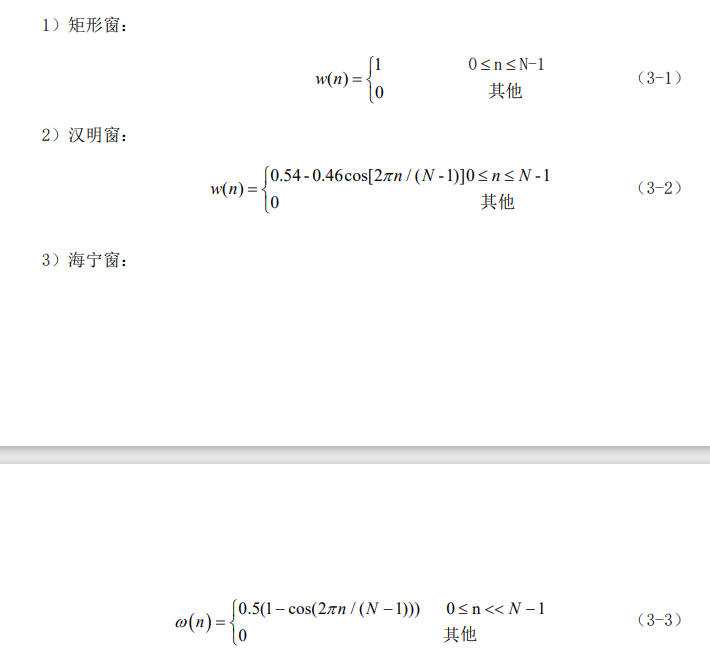

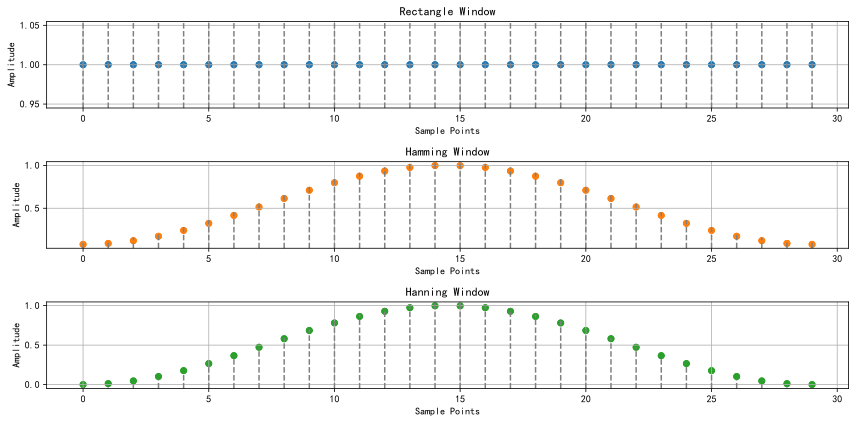

In [7]:
signal_length = 30 # 设置信号长度
sampling_points = np.arange(signal_length) # 设置采样点数
def rectangle_window(length): #实现矩形窗
    return np.ones(length)

def hamming_window(length,alpha=0.54,beta=0.46):
    n = np.arange(length)
    return alpha - beta * np.cos(2*np.pi*n/(length-1)) 

def hanning_window(length,alpha=0.5,one = 1):
    n = np.arange(length)
    return alpha*(one-np.cos(2*np.pi*n/(length-1)))
functions = [rectangle_window, hamming_window, hanning_window]
function_names = ['Rectangle Window', 'Hamming Window', 'Hanning Window']


# 绘制窗函数图形
plt.figure(figsize=(12, 6))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.scatter(sampling_points, functions[i](signal_length), color='C'+str(i), marker='o')
    plt.title(function_names[i])
    plt.xlabel('Sample Points')
    plt.ylabel('Amplitude')
    plt.grid()

     # 在每个点处添加垂直虚线
    for point in sampling_points:
        plt.scatter(point, functions[i](signal_length)[point], color='C'+str(i), marker='o')
        plt.axvline(x=point,ymin=0,ymax = functions[i](signal_length)[point], linestyle='dashed', color='gray')

plt.tight_layout()
plt.show()

In [11]:
# 读取音频文件
s, fs = soundfile.read('实验3.wav')  # 将文件读取为信号 s，并获取采样率 fs
Slen = len(s)  # 获取信号的长度
FFTLen = 128  # 定义 FFT 长度
FrameLen = 64  # 定义帧长
win = np.sin(np.linspace(0.5, FFTLen - 0.5, FFTLen) / FFTLen * np.pi).T  # 定义窗函数 win
ss = np.zeros(FFTLen)  # 初始化长度为 FFTLen 的零数组 ss
sst = np.zeros(FFTLen)  # 初始化长度为 FFTLen 的零数组 sst
frameoverlap = np.zeros(FFTLen - FrameLen)  # 初始化长度为 FFTLen-FrameLen 的零数组 frameoverlap
framenum = int(Slen / FrameLen) - 1  # 计算帧数
out = np.zeros(Slen)  # 初始化与输入信号长度相同的零数组 out

# 处理每一帧的数据
for kk in range(framenum):  # 循环每一帧
    pos = kk * FrameLen  # 计算帧的位置
    In = s[pos: pos + FrameLen, 0]  # 提取当前帧的数据
    ss[FFTLen - FrameLen:] = In  # 将当前帧数据添加到 ss 的末尾
    ss[0: FFTLen - FrameLen] = sst[FrameLen:]  # 将 sst 的一部分数据添加到 ss 的开头
    sst = ss.copy()  # 复制 ss 到 sst
    ss1 = ss * win  # 将窗函数应用于 ss
    fftss = np.fft.fft(ss1) 

    # 添加必要的算法，这部分需要根据具体算法进行注释

    ifftss = np.real(np.fft.ifft(fftss))  # 对 FFT 变换后的结果进行逆变换
    ifftss = ifftss * win  # 将窗函数应用于逆变换后的结果
    ifftss[0: FFTLen - FrameLen] = ifftss[0: FFTLen - FrameLen] + frameoverlap  # 添加重叠部分
    frameoverlap = ifftss[FrameLen:]  # 更新重叠部分
    out[pos: pos + FrameLen] = ifftss[0: FrameLen]  # 将处理后的数据添加到 out 中


out = out[(FFTLen - FrameLen):]  # 截取有效部分
lenout = len(out)  # 获取处理后信号的长度
re = np.zeros([2, lenout])  # 初始化 2 行 lenout 列的零数组 re
re[0, :] = s[0:lenout, 0]  # 将原始信号的第一列复制到 re 的第一行
re[1, :] = out  # 将处理后的信号复制到 re 的第二行
plt.figure(figsize=(12,12))
# 绘制图形
plt.subplot(2, 1, 1)  # 创建第一个子图
plt.plot(re[0, :])  # 绘制原始信号
plt.xlabel('采样点')  # 添加 x 轴标签
plt.ylabel('幅度')  # 添加 y 轴标签
plt.title('(a)原始信号')  # 添加标题

plt.subplot(2, 1, 2)  # 创建第二个子图
plt.plot(re[1, :])  # 绘制处理后的信号
plt.xlabel('采样点')  # 添加 x 轴标签
plt.ylabel('幅度')  # 添加 y 轴标签
plt.title('(b)还原信号')  # 添加标题
plt.show()  # 显示图形

# 将处理后的信号写入文件
soundfile.write('实验3处理.wav', out, fs)  # 将处理后的信号写入文件 sweepN.wav，采样率为 fs

LibsndfileError: Error opening '实验3.wav': System error.

In [ ]:
# 读取文件
sample_rate,signal = wavfile.read("实验3.wav")
signal.shape

In [8]:
signal_left = signal[:,0] # 左声道
signal_right = signal[:,1] # 右声道

NameError: name 'signal' is not defined

In [9]:
# 预加重处理
pre_emphasis = 0.95
signal_left_emphasis = np.append(signal_left[0],signal_left[1:] - pre_emphasis * signal_left[:-1])
signal_right_emphasis = np.append(signal_right[0],signal_right[1:] - pre_emphasis * signal_right[:-1])
print(signal_left.shape)
print(signal_right.shape)

NameError: name 'signal_left' is not defined

In [10]:
# 分帧
frame_length = 400
frame_shift = 200
frame_left = [signal_left_emphasis[i:i+frame_length] for i in range(0,len(signal_left_emphasis)-frame_length,frame_shift)]
frame_right = [signal_right_emphasis[i:i+frame_length] for i in range(0,len(signal_right_emphasis)-frame_length,frame_shift)]

NameError: name 'signal_left_emphasis' is not defined

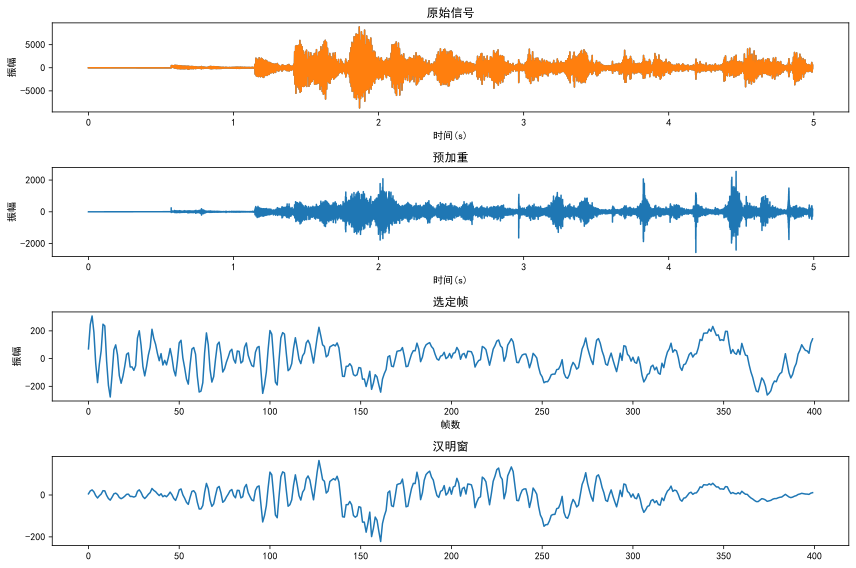

In [35]:
# 选择要展示的帧
frame_to_display = 190  # 假设选择第5帧进行展示

# 选择窗函数
frame_length = 400
frame_left_selected = frame_left[frame_to_display]
frame_right_selected = frame_right[frame_to_display]

# 加窗处理
hamming_window = np.hamming(frame_length)
hanning_window = np.hanning(frame_length)
rectangular_window = np.ones(frame_length)
triangular_window = 1 - np.abs(2 * np.arange(frame_length) - (frame_length - 1)) / (frame_length - 1)

windowed_frame_left_hamming = frame_left_selected * hamming_window
windowed_frame_right_hamming = frame_right_selected * hamming_window

# 合成波形
emphasized_signal_left = np.append(signal_left[0], signal_left[1:] - pre_emphasis * signal_left[:-1])
emphasized_signal_right = np.append(signal_right[0], signal_right[1:] - pre_emphasis * signal_right[:-1])

# 绘制图形
plt.figure(figsize=(12, 8))

# 原始信号
plt.subplot(4, 1, 1)
plt.plot(np.arange(len(signal))/sample_rate,signal)
plt.title('原始信号')
plt.xlabel("时间(s)")
plt.ylabel("振幅")



# 预加重信号
plt.subplot(4, 1, 2)
plt.plot(np.arange(len(emphasized_signal_left))/sample_rate,emphasized_signal_left)
plt.title('预加重')
plt.xlabel("时间(s)")
plt.ylabel("振幅")


plt.subplot(4, 1, 3)
plt.plot(frame_left_selected)
plt.title('选定帧')
plt.xlabel("帧数")
plt.ylabel("振幅")

plt.subplot(4, 1, 4)
plt.plot(windowed_frame_left_hamming)
plt.title('汉明窗')
plt.tight_layout()
plt.show()
